In [1]:
from pathlib import Path

import pyparsing as pp

mess_inp_file = Path("01_1-32_mess.inp")
spc_file = Path("species.csv")

In [2]:
from mess_io_proto import surface

surf = surface.from_mess(mess_inp_file, spc_inp=spc_file)
surf = surface.with_energies_relative_to(surf, 28)
surf = surface.without_fake_wells(surf)
# surface.display_network(surf)

<Figure size 1000x500 with 0 Axes>

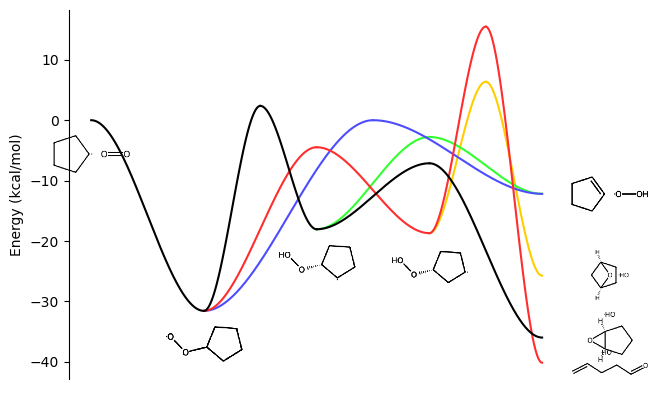

In [5]:
from matplotlib import pyplot

size = (10, 5)
fig = pyplot.figure(figsize=size)
fig = pyplot.figure()


class Color:
    black = "#000000"
    red = "#FF2E2EFF"
    blue = "#4D4DFFFF"
    green = "#31FF31FF"
    yellow = "#ffcd00ff"


paths, colors = zip(
    ([28, 0, 1, 22], Color.black),
    ([0, 3, 20], Color.red),
    ([0, 21], Color.blue),
    ([1, 21], Color.green),
    ([3, 23], Color.yellow),
    strict=True,
)
fig = surface.plot_paths(
    surf,
    paths=paths,
    fig=fig,
    colors=colors,
    stereo=True,
)

# pyplot.savefig("plot.svg")

In [ ]:
# path0 = surface.path_from_well_id_sequence(surf, [28, 0, 1, 22])
# path1 = surface.path_from_well_id_sequence(surf, [28, 0, 21])
# path1

In [ ]:
# from importlib import reload

# from matplotlib import pyplot

# reload(surface)


# size = (10, 5)
# fig = pyplot.figure(figsize=size)
# fig = pyplot.figure()

# data0 = list(enumerate(path0))
# data1 = list(enumerate(path1))
# fig = surface.plot_path_data(data0, fig=fig, amchi_mapping=surf.amchi_mapping)
# fig = surface.plot_path_data(
#     data1, fig=fig, amchi_mapping=surf.amchi_mapping, color="red"
# )